# Comparing the linear and MTL network

In [ ]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate
import socket
import math

In [ ]:
datafile = fits.open('/content/sample_data/PAU_narrowband_data_full.fits')

In [ ]:
big_endian = np.array(datafile[1].data)

In [ ]:
little_endian = big_endian.byteswap().newbyteorder()

In [ ]:
dataframe = pd.DataFrame(little_endian)

In [ ]:
dataframe

,ref_id,zb,odds,pz_width,zb_mean,chi2,ebv,qz,best_run,ra,...,flux_error_nb755,flux_error_nb765,flux_error_nb775,flux_error_nb785,flux_error_nb795,flux_error_nb805,flux_error_nb815,flux_error_nb825,flux_error_nb835,flux_error_nb845
0,80397,0.544,0.8210,0.0083,0.5450,41.313702,0.45,0.4166,23,150.6382,...,4.9193,6.4177,4.6348,5.9254,6.3482,4.8955,3.8653,4.8409,6.0276,7.0980
1,87325,0.798,0.5739,0.0222,0.7958,59.148399,0.50,2.2850,34,150.1789,...,7.1171,7.7600,6.5153,6.6880,7.4494,7.3289,9.1884,6.1926,8.5794,8.4658
2,86977,0.243,0.8964,0.0055,0.2432,111.064201,0.50,0.6862,34,150.0916,...,6.3193,7.0438,5.1723,5.7361,6.6661,6.6789,4.6647,5.4333,7.1245,7.5563
3,111261,0.704,0.7540,0.0121,0.7028,35.295300,0.50,0.5655,14,149.5003,...,7.1861,8.6612,7.9072,10.4661,8.7725,7.5637,7.5988,10.2961,8.8075,12.4692
4,110401,0.936,0.6924,0.0739,0.9314,34.369900,0.50,3.6704,14,149.5225,...,3.4669,4.8872,4.3785,5.5476,5.0291,4.2719,4.0418,4.8604,4.9919,7.6921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,103771,0.702,0.5763,0.0175,0.7000,66.320602,0.00,2.0127,0,150.1184,...,3.8849,4.2178,5.1221,5.7916,5.3083,4.5736,3.6708,5.9066,3.8129,4.4551
6488,11591,0.321,0.7246,0.0123,0.3235,39.670101,0.35,0.6738,31,149.9980,...,6.6791,10.2385,7.7635,7.8618,9.4040,6.4277,5.4750,6.6183,11.5353,9.7041
6489,1403,0.527,0.4821,0.0377,0.5272,31.482300,0.50,2.4633,34,149.9979,...,6.2800,6.8168,7.8549,6.1244,7.9150,5.2286,4.5011,5.3341,7.9689,7.8121
6490,102783,0.585,0.4651,0.0437,0.5829,36.222698,0.50,3.4052,14,150.1458,...,4.4939,4.7786,6.6515,6.3100,7.3730,5.8312,4.2179,6.5242,4.7222,5.1731


In [ ]:
print(dataframe.columns.to_list())

['ref_id', 'zb', 'odds', 'pz_width', 'zb_mean', 'chi2', 'ebv', 'qz', 'best_run', 'ra', 'dec', 'zp_gal', 'zl68_gal', 'zu68_gal', 'zl99_gal', 'zu99_gal', 'zp_sec', 'dchi', 'imag', 'ei', 'i_auto', 'nbfilt', 'mod_gal', 'type', 'umag', 'bmag', 'vmag', 'gmag', 'rmag', 'zmag', 'icmag', 'jmag', 'kmag', 'mv', 'ebv_gal', 'ebv_int', 'acs_a_image', 'acs_b_image', 'acs_theta_image', 'acs_mag_auto', 'acs_magerr_auto', 'zspec', 'conf', 'f814w', 'r50', 'sersic_n_gim2d', 'flux_nb455', 'flux_nb465', 'flux_nb475', 'flux_nb485', 'flux_nb495', 'flux_nb505', 'flux_nb515', 'flux_nb525', 'flux_nb535', 'flux_nb545', 'flux_nb555', 'flux_nb565', 'flux_nb575', 'flux_nb585', 'flux_nb595', 'flux_nb605', 'flux_nb615', 'flux_nb625', 'flux_nb635', 'flux_nb645', 'flux_nb655', 'flux_nb665', 'flux_nb675', 'flux_nb685', 'flux_nb695', 'flux_nb705', 'flux_nb715', 'flux_nb725', 'flux_nb735', 'flux_nb745', 'flux_nb755', 'flux_nb765', 'flux_nb775', 'flux_nb785', 'flux_nb795', 'flux_nb805', 'flux_nb815', 'flux_nb825', 'flux_nb8

Converting to individual numpy arrays

In [ ]:
data = dataframe.to_numpy()

In [ ]:
bb = data[:,dataframe.columns.get_loc("umag"):dataframe.columns.get_loc("kmag")+1]

In [ ]:
nb = data[:,dataframe.columns.get_loc("flux_nb455"):dataframe.columns.get_loc("flux_nb845")+1]

In [ ]:
zspec = data[:,dataframe.columns.get_loc("zspec")]

In [ ]:
zspec = np.reshape(zspec,[6492,1])

In [ ]:
icmag = data[:,dataframe.columns.get_loc("icmag")]

## Converting magnitude into fluxes

In [ ]:
nb = np.power(10, (26 - nb)/2.5)

In [ ]:
bb = np.power(10, (26 - bb)/2.5)

## Normalizing the Data

In [ ]:
for i in range(len(bb)):
  result_bb = np.linalg.norm(bb[i])
  bb[i] = bb[i]/result_bb

  result_nb = np.linalg.norm(nb[i])
  nb[i] = nb[i]/result_nb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


# MTL architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MTL(nn.Module):
  def __init__(self):
    super(MTL,self).__init__()
    self.l1 = nn.Linear(9,9)
    self.d1 = nn.Dropout(p = 0.02)
    self.l2 = nn.Linear(9, 300)
    self.d2 = nn.Dropout(p = 0.02)
    self.l3 = nn.Linear(300, 500)
    self.d3 = nn.Dropout(p = 0.02)
    self.l4 = nn.Linear(500,1000)
    self.d4 = nn.Dropout(p = 0.02)
    self.l5 = nn.Linear(1000,500)

    self.d5 = nn.Dropout(p = 0.02)
    self.nb = nn.Linear(500,40)

    self.d6 = nn.Dropout(p = 0.02)
    self.l6 = nn.Linear(500,300)
    self.pz = nn.Linear(300,1)

  def forward(self, x):
    m = nn.GELU()
    x = m(self.l1(x))
    x = self.d1(x)
    x = m(self.l2(x))
    x = self.d2(x)
    x = m(self.l3(x))
    x = self.d3(x)
    x = m(self.l4(x))
    x = self.d4(x)
    x = m(self.l5(x))

    nband = self.d5(x)
    nband = m(self.nb(nband))

    photoz = self.d6(x)
    photoz = m(self.l6(photoz))
    photoz = m(self.pz(photoz))

    return nband, photoz



mtl = MTL()
print(mtl)

MTL(
  (l1): Linear(in_features=9, out_features=9, bias=True)
  (d1): Dropout(p=0.02, inplace=False)
  (l2): Linear(in_features=9, out_features=300, bias=True)
  (d2): Dropout(p=0.02, inplace=False)
  (l3): Linear(in_features=300, out_features=500, bias=True)
  (d3): Dropout(p=0.02, inplace=False)
  (l4): Linear(in_features=500, out_features=1000, bias=True)
  (d4): Dropout(p=0.02, inplace=False)
  (l5): Linear(in_features=1000, out_features=500, bias=True)
  (d5): Dropout(p=0.02, inplace=False)
  (nb): Linear(in_features=500, out_features=40, bias=True)
  (d6): Dropout(p=0.02, inplace=False)
  (l6): Linear(in_features=500, out_features=300, bias=True)
  (pz): Linear(in_features=300, out_features=1, bias=True)
)


# Linear network Architecture

In [ ]:
class LinNet(nn.Module):
  def __init__(self):
    super(LinNet,self).__init__()
    self.l1 = nn.Linear(9,9)
    self.d1 = nn.Dropout(p = 0.02)
    self.l2 = nn.Linear(9, 300)
    self.d2 = nn.Dropout(p = 0.02)
    self.l3 = nn.Linear(300, 500)
    self.d3 = nn.Dropout(p = 0.02)
    self.l4 = nn.Linear(500,1000)
    self.d4 = nn.Dropout(p = 0.02)
    self.l5 = nn.Linear(1000,500)

    self.d6 = nn.Dropout(p = 0.02)
    self.l6 = nn.Linear(500,300)
    self.pz = nn.Linear(300,1)

  def forward(self, x):
    m = nn.GELU()
    x = m(self.l1(x))
    x = self.d1(x)
    x = m(self.l2(x))
    x = self.d2(x)
    x = m(self.l3(x))
    x = self.d3(x)
    x = m(self.l4(x))
    x = self.d4(x)
    x = m(self.l5(x))

    photoz = self.d6(x)
    photoz = m(self.l6(photoz))
    photoz = m(self.pz(photoz))

    return photoz



linear = LinNet()
print(linear)

LinNet(
  (l1): Linear(in_features=9, out_features=9, bias=True)
  (d1): Dropout(p=0.02, inplace=False)
  (l2): Linear(in_features=9, out_features=300, bias=True)
  (d2): Dropout(p=0.02, inplace=False)
  (l3): Linear(in_features=300, out_features=500, bias=True)
  (d3): Dropout(p=0.02, inplace=False)
  (l4): Linear(in_features=500, out_features=1000, bias=True)
  (d4): Dropout(p=0.02, inplace=False)
  (l5): Linear(in_features=1000, out_features=500, bias=True)
  (d6): Dropout(p=0.02, inplace=False)
  (l6): Linear(in_features=500, out_features=300, bias=True)
  (pz): Linear(in_features=300, out_features=1, bias=True)
)


# Optimizer and Loss Function

In [ ]:
import torch.optim as optim

criterion_pz = nn.MSELoss()
criterion_nb = nn.L1Loss()

optimizer1 = optim.Adam(mtl.parameters(), lr=0.001)
scheduler1 = optim.lr_scheduler.StepLR(optimizer1, step_size=25, gamma=0.1)

optimizer2 = optim.Adam(linear.parameters(), lr=0.001)
scheduler2 = optim.lr_scheduler.StepLR(optimizer2, step_size=25, gamma=0.1)

### Converting into tensors

In [ ]:
tensor_zspec = torch.from_numpy(zspec)
tensor_zspec = tensor_zspec.to(torch.float32)

In [ ]:
tensor_zspec.shape

torch.Size([6492, 1])

In [ ]:
tensor_bb = torch.from_numpy(bb)
tensor_bb = tensor_bb.to(torch.float32)

In [ ]:
tensor_nb = torch.from_numpy(nb)
tensor_nb = tensor_nb.to(torch.float32)

### Splitting into testing and training data

In [ ]:
from sklearn.model_selection import train_test_split
bb_train, bb_test, nb_train, nb_test, pz_train, pz_test, icmag_train, icmag_test = train_test_split(tensor_bb, tensor_nb, tensor_zspec, icmag, test_size = 0.2, shuffle=True)

# Training the model

## MTL model

In [ ]:
batch_size = 10
num_batches = int(len(bb_train)/batch_size)

for epoch in range(100):  # loop over the dataset multiple times
    #running_loss = 0.0
    for i in list(range(0, num_batches, 1)):

        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        nband, photoz = mtl(bb_train[i*batch_size: (i+1)*batch_size][:])
        #nband, photoz = net(bb_train[i])
        #loss1 = criterion_pz(photoz, pz_train[i])
        #loss2 = criterion_nb(nband, nb_train[i])
        loss1 = criterion_pz(photoz, pz_train[i*batch_size: (i+1)*batch_size][:])
        loss2 = criterion_nb(nband, nb_train[i*batch_size: (i+1)*batch_size][:])
        loss = loss1 + loss2
        #optimizer.zero_grad()
        loss.backward()
        optimizer1.step()

        # print statistics
        # running_loss += loss1.item()
        # if i % 200 == 199:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
        #     running_loss = 0.0
    print(f'[{epoch + 1}] loss: {loss1:.3f}')
    scheduler1.step()
print('Finished Training')

[1] loss: 0.073
[2] loss: 0.089
[3] loss: 0.043
[4] loss: 0.046
[5] loss: 0.034
[6] loss: 0.031
[7] loss: 0.032
[8] loss: 0.029
[9] loss: 0.032
[10] loss: 0.031
[11] loss: 0.036
[12] loss: 0.021
[13] loss: 0.018
[14] loss: 0.012
[15] loss: 0.019
[16] loss: 0.010
[17] loss: 0.015
[18] loss: 0.013
[19] loss: 0.008
[20] loss: 0.012
[21] loss: 0.015
[22] loss: 0.008
[23] loss: 0.012
[24] loss: 0.010
[25] loss: 0.016
[26] loss: 0.011
[27] loss: 0.012
[28] loss: 0.012
[29] loss: 0.010
[30] loss: 0.025
[31] loss: 0.010
[32] loss: 0.012
[33] loss: 0.009
[34] loss: 0.007
[35] loss: 0.010
[36] loss: 0.011
[37] loss: 0.010
[38] loss: 0.009
[39] loss: 0.009
[40] loss: 0.011
[41] loss: 0.009
[42] loss: 0.015
[43] loss: 0.009
[44] loss: 0.012
[45] loss: 0.010
[46] loss: 0.010
[47] loss: 0.010
[48] loss: 0.010
[49] loss: 0.010
[50] loss: 0.011
[51] loss: 0.010
[52] loss: 0.009
[53] loss: 0.011
[54] loss: 0.010
[55] loss: 0.009
[56] loss: 0.010
[57] loss: 0.010
[58] loss: 0.007
[59] loss: 0.009
[60] l

In [ ]:
predicted_nb, predicted_pz = mtl(bb_test)

Text(0.0, 1.0, '$\\sigma_{68}$ = 0.024114\nMedian = 0.001138\nOutlier Rate = 0.010777')

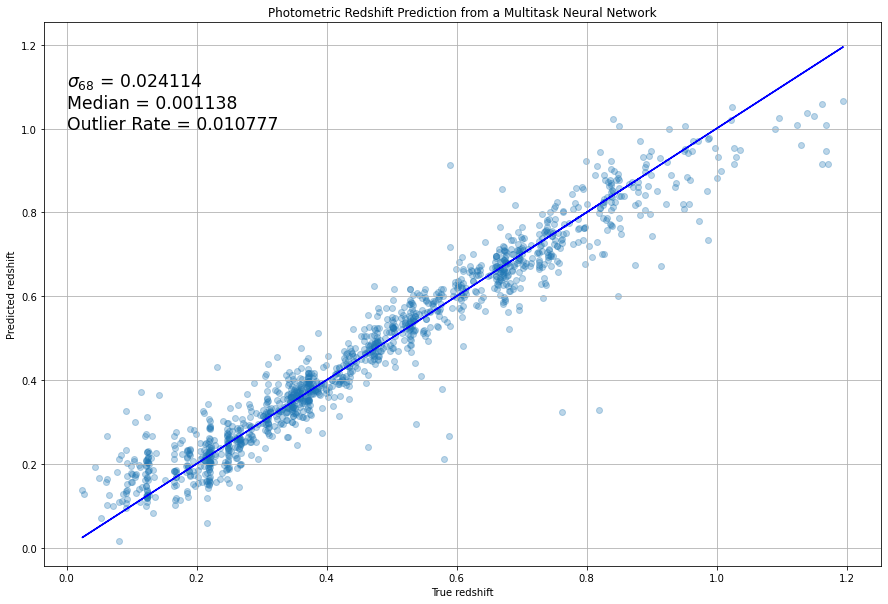

In [ ]:
x = pz_test.detach().numpy()
y = predicted_pz.detach().numpy()

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 10))
fig.tight_layout()

plt.title('Photometric Redshift Prediction from a Multitask Neural Network')
plt.scatter(x,y, alpha = 0.3)
plt.plot(x,x, 'b-')
plt.grid(visible = True)
plt.xlabel('True redshift')
plt.ylabel('Predicted redshift')
plt.savefig('MTL.png')
plt.text(0.0,1.0,"$\sigma_{68}$ = 0.024114\nMedian = 0.001138\nOutlier Rate = 0.010777",fontsize = 'xx-large')

In [ ]:
PATH = 'mtl_final.pt'
torch.save(mtl,PATH)

## Linear model

In [ ]:
batch_size = 10
num_batches = int(len(bb_train)/batch_size)

for epoch in range(100):  # loop over the dataset multiple times
    #running_loss = 0.0
    for i in list(range(0, num_batches, 1)):

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        photoz = linear(bb_train[i*batch_size: (i+1)*batch_size][:])
        #nband, photoz = net(bb_train[i])
        #loss1 = criterion_pz(photoz, pz_train[i])
        #loss2 = criterion_nb(nband, nb_train[i])
        loss1 = criterion_pz(photoz, pz_train[i*batch_size: (i+1)*batch_size][:])
        #loss2 = criterion_nb(nband, nb_train[i*batch_size: (i+1)*batch_size][:])
        #loss = loss1 + loss2
        #optimizer.zero_grad()
        loss1.backward()
        optimizer2.step()

        # print statistics
        # running_loss += loss1.item()
        # if i % 200 == 199:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
        #     running_loss = 0.0
    print(f'[{epoch + 1}] loss: {loss1:.3f}')
    scheduler2.step()
print('Finished Training')

[1] loss: 0.041
[2] loss: 0.035
[3] loss: 0.038
[4] loss: 0.063
[5] loss: 0.054
[6] loss: 0.033
[7] loss: 0.035
[8] loss: 0.021
[9] loss: 0.019
[10] loss: 0.022
[11] loss: 0.029
[12] loss: 0.012
[13] loss: 0.010
[14] loss: 0.017
[15] loss: 0.012
[16] loss: 0.011
[17] loss: 0.012
[18] loss: 0.029
[19] loss: 0.017
[20] loss: 0.012
[21] loss: 0.013
[22] loss: 0.009
[23] loss: 0.015
[24] loss: 0.008
[25] loss: 0.015
[26] loss: 0.010
[27] loss: 0.006
[28] loss: 0.009
[29] loss: 0.010
[30] loss: 0.009
[31] loss: 0.008
[32] loss: 0.009
[33] loss: 0.010
[34] loss: 0.007
[35] loss: 0.009
[36] loss: 0.008
[37] loss: 0.009
[38] loss: 0.008
[39] loss: 0.008
[40] loss: 0.007
[41] loss: 0.008
[42] loss: 0.009
[43] loss: 0.008
[44] loss: 0.007
[45] loss: 0.009
[46] loss: 0.008
[47] loss: 0.009
[48] loss: 0.009
[49] loss: 0.008
[50] loss: 0.008
[51] loss: 0.009
[52] loss: 0.008
[53] loss: 0.010
[54] loss: 0.010
[55] loss: 0.008
[56] loss: 0.008
[57] loss: 0.009
[58] loss: 0.010
[59] loss: 0.009
[60] l

In [ ]:
PATH = 'linear_final.pt'
torch.save(linear,PATH)

In [ ]:
predicted_linear_pz = linear(bb_test)

Text(0.0, 2.0, '$\\sigma_{68}$ = 0.029615\nMedian = 0.001848\nOutlier Rate = 0.010007')

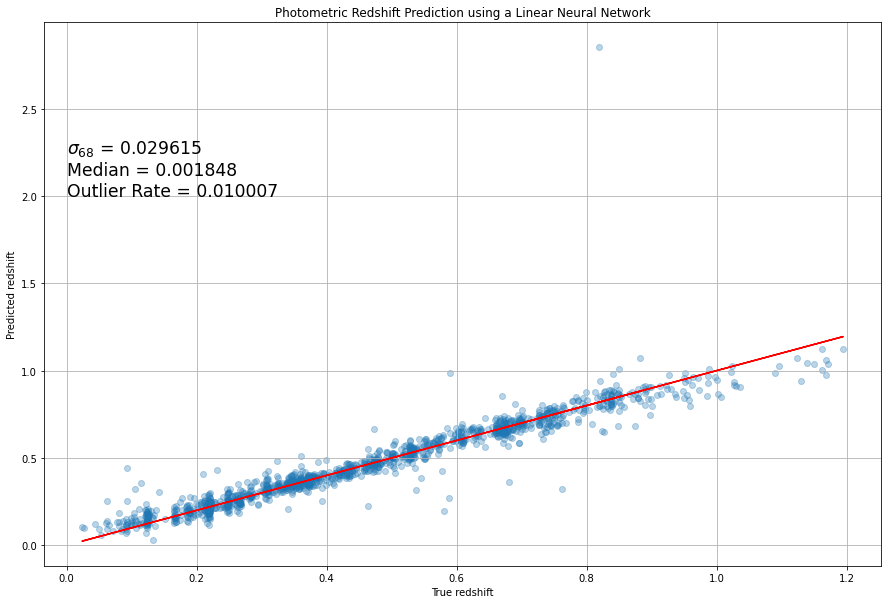

In [ ]:
x = pz_test.detach().numpy()
y = predicted_linear_pz.detach().numpy()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
fig.tight_layout()

plt.title('Photometric Redshift Prediction using a Linear Neural Network')
plt.scatter(x,y, alpha = 0.3)
plt.plot(x,x, 'r-')
plt.xlabel('True redshift')
plt.ylabel('Predicted redshift')
plt.grid(visible = True)
plt.text(0.0,2.0,"$\sigma_{68}$ = 0.029615\nMedian = 0.001848\nOutlier Rate = 0.010007",fontsize = 'xx-large')

# Metrics for Comparison

In [ ]:
delta_z_linear = np.ones([len(pz_test),1])
delta_z_mtl = np.ones([len(pz_test),1])

zp1 = predicted_linear_pz.detach().numpy()
zt1 = pz_test.detach().numpy()

zp2 = predicted_pz.detach().numpy()

for i in range(len(pz_test)):
  delta_z_linear[i] = (zp1[i] - zt1[i])/(1 + zt1[i])
  delta_z_mtl[i] = (zp2[i] - zt1[i])/(1 + zt1[i])

In [ ]:
dispersion_mtl = 0.5*(np.percentile(delta_z_mtl,84) - np.percentile(delta_z_mtl,16))

In [ ]:
dispersion_linear = 0.5*(np.percentile(delta_z_linear,84) - np.percentile(delta_z_linear,16))

In [ ]:
dispersion_mtl

0.02961581137031316

In [ ]:
dispersion_linear

0.024114095978438853

In [ ]:
median_mtl = np.median(delta_z_mtl)
median_mtl

0.0011382726952433586

In [ ]:
median_linear = np.median(delta_z_linear)
median_linear

0.0018482932355254889

In [ ]:
delta_z_linear_mod = np.ones([len(pz_test),1])
delta_z_mtl_mod = np.ones([len(pz_test),1])

zp1 = predicted_linear_pz.detach().numpy()
zt1 = pz_test.detach().numpy()

zp2 = predicted_pz.detach().numpy()

outlier_mtl = 0
outlier_linear = 0

for i in range(len(pz_test)):
  delta_z_linear_mod[i] = abs(zp1[i] - zt1[i])/(1 + zt1[i])
  delta_z_mtl_mod[i] = abs(zp2[i] - zt1[i])/(1 + zt1[i])

for i in range(len(pz_test)):
  if delta_z_linear_mod[i] > 0.15:
    outlier_linear = outlier_linear + 1

  if delta_z_mtl_mod[i] > 0.15:
    outlier_mtl = outlier_mtl + 1

mtl_outliers = outlier_mtl/len(pz_test)
linear_outliers = outlier_linear/len(pz_test)

In [ ]:
print('MTL Outliers: ', mtl_outliers)
print('Linear Outliers: ', linear_outliers)

MTL Outliers:  0.01077752117013087
Linear Outliers:  0.010007698229407237


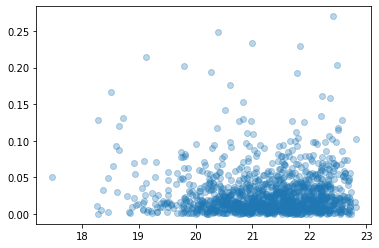

In [ ]:
plt.scatter(icmag_test,delta_z_mtl_mod,alpha = 0.3)

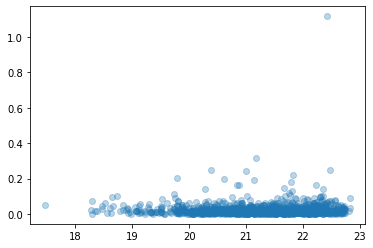

In [ ]:
plt.scatter(icmag_test,delta_z_linear_mod,alpha = 0.3)